# EDA Project Sprint #7: 

## Description of the project: Through the analysis of 5 different data sets that belong to a shopping cart site, I will get some insights of customers habits.

**The project is divided in two parts:**<br>
**1. Pre-processing of each data frame, includes finding and filling missing values, cleaning up duplicates and prepare each data frame for its analysis.**<br>
**2. Ananlysis of the data, includes to look at the combination of various dataframes and see how the data relates so it is possible to get some conclusions which are requested.**

***

**Data sets: I am going to work with the following data sets:<br>**
> 1. instacart_orders.csv<br>
> 2. products.csv<br>
> 3. order_products.csv<br>
> 4. aisles.csv<br>
> 5. departments.csv

**1. Pre-processing step:** Opening files and getting general view of the data and structure: On the following steps I am going to open each data set individually and get the general information about the data frame.

***

In [1]:
# import libraries needed for all the project.
import pandas as pd
# import library to identify what day is which number.
import calendar
# import library for making visualizations.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
local_path = '/Users/cesarchaparro/desktop/TripleTen/Sprint 7/Project/datasets/instacart_orders.csv'
public_path = '/datasets/instacart_orders.csv'
try:
    # attempt to read the local file.
    df_orders = pd.read_csv(local_path)
except FileNotFoundError:
    try:
        # attempt to read the public file.
        df_orders = pd.read_csv(public_path)
    except FileNotFoundError:
        # handle the case where neither file is found.
        print("Neither local nor public file found.")
    except Exception as e:
        # handle other exceptions for public file.
        print("An error occurred while reading the public file:", e)
    else:
        # code to execute if the public file is successfully read.
        print("Public file successfully read.")
else:
    # code to execute if the local file is successfully read.
    print("Local file successfully read.")

Local file successfully read.


In [3]:
# open data frame for orders file.
df_orders = pd.read_csv('/Users/cesarchaparro/desktop/TripleTen/Sprint 7/Project/datasets/instacart_orders.csv', sep=';') #open the dataset from path
df_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [4]:
# general info about data frame.
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
local_path = '/Users/cesarchaparro/desktop/TripleTen/Sprint 7/Project/datasets/products.csv'
public_path = '/datasets/products.csv'
try:
    # attempt to read the local file.
    df_products = pd.read_csv(local_path)
except FileNotFoundError:
    try:
        # attempt to read the public file.
        df_products = pd.read_csv(public_path)
    except FileNotFoundError:
        # handle the case where neither file is found.
        print("Neither local nor public file found.")
    except Exception as e:
        # handle other exceptions for public file.
        print("An error occurred while reading the public file:", e)
    else:
        # code to execute if the public file is successfully read.
        print("Public file successfully read.")
else:
    # code to execute if the local file is successfully read.
    print("Local file successfully read.")

Local file successfully read.


In [6]:
# open data frame for products file.
df_products = pd.read_csv('/Users/cesarchaparro/desktop/TripleTen/Sprint 7/Project/datasets/products.csv', sep=';') #open file from path
df_products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [7]:
# general info about data frame.
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
local_path = '/Users/cesarchaparro/desktop/TripleTen/Sprint 7/Project/datasets/order_products.csv'
public_path = '/datasets/order_products.csv'
try:
    # attempt to read the local file.
    df_order_products = pd.read_csv(local_path)
except FileNotFoundError:
    try:
        # attempt to read the public file.
        df_order_products = pd.read_csv(public_path)
    except FileNotFoundError:
        # handle the case where neither file is found.
        print("Neither local nor public file found.")
    except Exception as e:
        # handle other exceptions for public file.
        print("An error occurred while reading the public file:", e)
    else:
        # code to execute if the public file is successfully read.
        print("Public file successfully read.")
else:
    # code to execute if the local file is successfully read.
    print("Local file successfully read.")

Local file successfully read.


In [9]:
# open data frame for order_products file.
df_order_products = pd.read_csv('/Users/cesarchaparro/desktop/TripleTen/Sprint 7/Project/datasets/order_products.csv', sep=';') #open file from path
df_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [10]:
# general info about data frame.
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [11]:
local_path = '/Users/cesarchaparro/desktop/TripleTen/Sprint 7/Project/datasets/aisles.csv'
public_path = '/datasets/aisles.csv'
try:
    # attempt to read the local file.
    df_aisles = pd.read_csv(local_path)
except FileNotFoundError:
    try:
        # attempt to read the public file.
        df_aisles = pd.read_csv(public_path)
    except FileNotFoundError:
        # handle the case where neither file is found.
        print("Neither local nor public file found.")
    except Exception as e:
        # handle other exceptions for public file.
        print("An error occurred while reading the public file:", e)
    else:
        # code to execute if the public file is successfully read.
        print("Public file successfully read.")
else:
    # code to execute if the local file is successfully read.
    print("Local file successfully read.")

Local file successfully read.


In [12]:
# open data frame for aisles file.
df_aisles = pd.read_csv('/Users/cesarchaparro/desktop/TripleTen/Sprint 7/Project/datasets/aisles.csv', sep=';') #open file from path
df_aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [13]:
# general info about data frame.
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [14]:
local_path = '/Users/cesarchaparro/desktop/TripleTen/Sprint 7/Project/datasets/departments.csv'
public_path = '/datasets/departments.csv'
try:
    # attempt to read the local file.
    df_departments = pd.read_csv(local_path)
except FileNotFoundError:
    try:
        # attempt to read the public file.
        df_departments = pd.read_csv(public_path)
    except FileNotFoundError:
        # handle the case where neither file is found.
        print("Neither local nor public file found.")
    except Exception as e:
        # handle other exceptions for public file.
        print("An error occurred while reading the public file:", e)
    else:
        # code to execute if the public file is successfully read.
        print("Public file successfully read.")
else:
    # code to execute if the local file is successfully read.
    print("Local file successfully read.")

Local file successfully read.


In [15]:
# open data frame for departments file.
df_departments = pd.read_csv('/Users/cesarchaparro/desktop/TripleTen/Sprint 7/Project/datasets/departments.csv', sep=';') #open file from path
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [16]:
# general infor about data frame.
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


**Outcome:**

**1. I had to use the sep= parameter to be able to read the file, in this case the common delimiter for columns was ';', so after using the parameter we can easily read each data frame.**<br>
**2. From the info() method I can see the types of data are mostly correct, I observed that on the column 'add_to_cart_order' it is as a float when it really should be an integer, but this is the type of data registered on the data frame and it does not interfer with my analysis, so there should be a reason as why this type of data for this column, so I will not change it now.**<br>
**3. On all data sets the ID columns data types are integers64.**<br>
**4. Column names are correctly spelled and all in lower case with correct format.**

***

**2. Pre-processing step:** 2.1 Identifying and 2.2 filling missing values: On the following steps I am going to check by using various methods the existence of missing values and hidden omitted values and to replace missing values by some relevant data for the columns.

> **2.1 Identifying missing values and<br> 2.2 Filling missing values.**

***

In [17]:
# df_orders missing values.
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [18]:
# days_since_prior_order columns missing values.
df_orders['days_since_prior_order'].unique()

array([30.,  9.,  2., 10., 17., 15., 22.,  4.,  8.,  3., 12., 11.,  7.,
        1.,  5.,  6., 14., nan, 20., 16., 24., 23., 27., 13.,  0., 28.,
       21., 25., 19., 18., 29., 26.])

**From the above I can conclude that the missing values in effect come from the NaN values only. As there is also a value for 0 in case of a customer placing the order on the same day, the values NaN correspond to orders that were never done before, there is no prior day for those values, therefore it is not an actual missing data on the data frame.**

In [19]:
# df_products missing values.
df_products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

**Before I drop missing values right away, I want to check if there is any pattern on these values in correlation with any other columns, maybe there is a hidden factor that may be revelaed throught the analysis.**

In [20]:
# see what common values the missing values from product_name columns have with any other columns.
df_products[df_products.product_name.isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [21]:
# to check if all the missing values are common with the aisle_id 100 only or not.
df_products[df_products.product_name.isna()]['aisle_id'].unique()

array([100])

In [22]:
# to check if all the missing values are common with the department_id 21 only or not.
df_products[df_products.product_name.isna()]['department_id'].unique()

array([21])

In [23]:
# to display where are the missing values by looking on the other data frame df_aisles.
display(df_aisles[df_aisles['aisle_id'] == 100])

,aisle_id,aisle
99,100,missing


In [24]:
# to display where are the missing values by looking on the other data frame df_departments.
display(df_departments[df_departments['department_id'] == 21])

,department_id,department
20,21,missing


**From the above I can see that the missing values on the product_name column are all gathered in aisle_id 100 and department_id 21 only. It seems that this department and aisle are kind of location for unknown or not classified products.**

In [25]:
# missing values in data frame df_order_products.
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [26]:
# display minimum and maximum values on add_to_cart_order column.
df_order_products.add_to_cart_order.describe().astype(int)

count    4544171
mean           8
std            7
min            1
25%            3
50%            6
75%           11
max           64
Name: add_to_cart_order, dtype: int64

**I can see that there is a maximum number of products that can be added to the cart in the order. And that can obscure some information or performance.**

In [27]:
df_order_products[df_order_products.add_to_cart_order.isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [28]:
# all order_id with at least one missing value in add_to_cart_order.
orders_missing = list(df_order_products[df_order_products.add_to_cart_order.isna()]['order_id'].unique())
orders_missing

[2449164,
 1968313,
 2926893,
 1717990,
 1959075,
 844733,
 61355,
 936852,
 264710,
 1564093,
 129627,
 293169,
 2849370,
 1386261,
 3308010,
 903110,
 2136777,
 3347453,
 1888628,
 165801,
 2094761,
 1038146,
 2997021,
 813364,
 2256933,
 171934,
 2409109,
 1730767,
 1169835,
 733526,
 404157,
 3125735,
 747668,
 1800005,
 1961723,
 871281,
 388234,
 1648217,
 1477139,
 102236,
 1021563,
 1832957,
 2721963,
 678116,
 1220886,
 1673227,
 2999801,
 1633337,
 2470674,
 2625444,
 1677118,
 2479011,
 3383594,
 1183255,
 1713430,
 2652650,
 1598369,
 1916118,
 854647,
 1302315,
 888470,
 180546,
 2621907,
 1308785,
 2729254,
 9310,
 2170451,
 2979697,
 1625713,
 1529171]

In [29]:
# filter the data leaving only rows where order_id belongs to the rows with missing values.
df_order_products[df_order_products.order_id.isin(orders_missing)]

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0
...,...,...,...,...
4543519,2621907,32018,28.0,1
4544672,102236,34688,49.0,0
4544708,2256933,41544,21.0,0
4544771,180546,12741,46.0,1


In [30]:
# to check if all orders with missing values have more than 64 producs on their order.
df_order_products[df_order_products.order_id.isin(orders_missing)].groupby(['order_id'])['product_id'].nunique()

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

**As we can see there are orders with more than 64 products on the order cart.**

In [31]:
# to verify that all orders with missing values have more than 64 products, as from the last output was 70.
(df_order_products[df_order_products.order_id.isin(orders_missing)].groupby(['order_id'])['product_id'].nunique()>64).value_counts()

product_id
True    70
Name: count, dtype: int64

**Since there seems to be some anomalie on the add_to_cart_order amount of products that the cart is able to load on a purchase, I will save the maximum number of items that can be added to the cart as 999. To avoid future problems with this column.**

In [32]:
# to replace the missing values with 999.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)
df_order_products[df_order_products.order_id.isin(orders_missing)]['add_to_cart_order'].describe()

count    5316.000000
mean      184.492852
std       352.292769
min         1.000000
25%        19.000000
50%        38.000000
75%        57.000000
max       999.000000
Name: add_to_cart_order, dtype: float64

In [33]:
# check for missing values in df_aisles.
df_aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [34]:
# check for missing values in df_departments.
df_departments.isna().sum()

department_id    0
department       0
dtype: int64

**All missing values have been checked, analyzed and determined their value.**

> **3. Identifying and processing duplicates.**

***

**I will start checking for duplicates on each data frame separately and fixing on the go if it is necessary, in some cases I will also check for duplicates on columns within the data frame.**

In [35]:
# check for duplicates in df_orders.
df_orders.duplicated().sum()

15

**As I did earlier with missing values, I will also take a broad viewpoint to see if there is certain pattern for these duplicates correlated with other columns in the same data frame.**

In [36]:
# display data frame to see where are the duplicate values.
df_orders[df_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


**We can see that the duplicates occur on the day of the week and hour of the day when the order was placed.**

**The next steps are to see what is the meaning of 3 on the day of the week:**

In [37]:
# check value 0 on the calendar to get the day of the week.
calendar.day_name[0]

'Monday'

***For the purpose of understanding, I will use the parameters from the library on the processing of the data frame, I refer to the numbers as week days.***

In [38]:
# add a column on the df_orders to display the day of the week.
df_orders['day_of_week'] = df_orders.order_dow.apply(lambda x:calendar.day_name[x])
df_orders[df_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
145574,794638,50898,24,3,2,2.0,Thursday
223105,2160484,107525,16,3,2,30.0,Thursday
230807,1918001,188546,14,3,2,16.0,Thursday
266232,1782114,106752,1,3,2,NaN,Thursday
273805,1112182,202304,84,3,2,6.0,Thursday
284038,2845099,31189,11,3,2,7.0,Thursday
311713,1021560,53767,3,3,2,9.0,Thursday
321100,408114,68324,4,3,2,18.0,Thursday
323900,1919531,191501,32,3,2,7.0,Thursday
345917,2232988,82565,1,3,2,NaN,Thursday


**In this case number 3 is Thursday at 2:00, according to the calendar library.**

In [39]:
# selecting rows from the DataFrame df_orders where the orders were placed on Thursdays and the order hour of the day is 2.
df_orders[(df_orders.day_of_week == 'Thursday')&(df_orders.order_hour_of_day == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
4838,2766110,162084,41,3,2,16.0,Thursday
5156,2190225,138285,18,3,2,11.0,Thursday
15506,553049,58599,13,3,2,7.0,Thursday
18420,382357,120200,19,3,2,11.0,Thursday
24691,690242,77357,2,3,2,9.0,Thursday
...,...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0,Thursday
458816,910166,164782,18,3,2,4.0,Thursday
459635,1680532,106435,6,3,2,21.0,Thursday
468324,222962,54979,59,3,2,3.0,Thursday


In [40]:
for c in df_orders:
    print(c)
    print(df_orders[df_orders.duplicated()][c].unique())
    print('------------------')

order_id
[ 794638 2160484 1918001 1782114 1112182 2845099 1021560  408114 1919531
 2232988  391768  467134 1286742 2282673 2125197]
------------------
user_id
[ 50898 107525 188546 106752 202304  31189  53767  68324 191501  82565
  57671  63189 183220  86751  14050]
------------------
order_number
[24 16 14  1 84 11  3  4 32 19 21 48 49]
------------------
order_dow
[3]
------------------
order_hour_of_day
[2]
------------------
days_since_prior_order
[ 2. 30. 16. nan  6.  7.  9. 18. 10.  4.  3.]
------------------
day_of_week
['Thursday']
------------------


**From this it seems that something went wrong on the log in, or the server, or the connection at 2:00 Thursday, since the duplicates happen only for those two columns in common.**

In [41]:
# remove duplicates from df_orders.
df_orders = df_orders.drop_duplicates()
df_orders.duplicated().sum()

0

In [42]:
# check for duplicates in df_products.
df_products.duplicated().sum()

0

In [43]:
# check for duplicates in product_name column.
df_products['product_name'].duplicated().sum()

1257

In [44]:
# check how many values are added up on each unique value on column.
df_products['product_name'].value_counts()

product_name
BURRITO- STEAK & CHEESE                                              1
Chocolate Sandwich Cookies                                           1
All-Seasons Salt                                                     1
Robust Golden Unsweetened Oolong Tea                                 1
Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    1
                                                                    ..
Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants          1
Salted Caramel Lean Protein & Fiber Bar                              1
Fancy Feast Trout Feast Flaked Wet Cat Food                          1
Complete Spring Water Foaming Antibacterial Hand Wash                1
Wheat Chex Cereal                                                    1
Name: count, Length: 48436, dtype: int64

In [45]:
# transform column into lower strings.
df_products['product_name'] = df_products['product_name'].str.lower()
df_products

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [46]:
# check for duplicates with the new data frame.
df_products['product_name'].duplicated().sum()

1361

In [47]:
# check how many of the duplicates are missing values.
df_products['product_name'].isna().sum()

1258

In [48]:
# check for duplicates that are not missing values.
df_products[df_products.duplicated(subset=['product_name']) & (df_products.product_name.notna())]

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


**104 rows which are real duplicates.**

In [49]:
# remove duplicates except the values with NaN on the column.
df_products = df_products[df_products['product_name'].isnull() | ~df_products[df_products['product_name'].notnull()].duplicated(subset='product_name', keep=False)]
df_products

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49683,49684,vodka- triple distilled- twist of vanilla,124,5
49684,49685,en croute roast hazelnut cranberry,42,1
49685,49686,artisan baguette,112,3
49686,49687,smartblend healthy metabolism dry cat food,41,8


In [50]:
# check that the rest of duplicates have been removed.
df_products['product_name'].duplicated().sum()

1257

**Only the NaN values duplicated have been kept on the column, 1257 values. The rest of duplicated values have been removed from the data frame on product_name.**

**Next I will replace the NaN values by 'unknown' on the product_name column:**

In [51]:
# replace missing values by 'unknown' on the product_name column.
df_products.product_name=df_products.product_name.fillna('unknown')
df_products.isna().sum()

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_44776/3512226636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products.product_name=df_products.product_name.fillna('unknown')


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [52]:
# check for duplicates on the names of aisles.
df_aisles['aisle'].duplicated().sum()

0

In [53]:
# check for duplicates on the names of departments.
df_departments['department'].duplicated().sum()

0

**Duplicates have neen processed on all the data frames.**

**3. Analysis Step:<br>
            3.1 Verify that values in the 'order_hour_of_day' and 'order_dow' columns in the orders table are sensible (i.e. 'order_hour_of_day' ranges from 0 to 23 and 'order_dow' ranges from 0 to 6).**

***

In [54]:
# to verify the values on both columns of df_orders data frame.
columns_to_check = ['order_hour_of_day', 'order_dow']
for column in columns_to_check:
    print('column name:', column)
    print(sorted(df_orders[column].unique()))

column name: order_hour_of_day
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
column name: order_dow
[0, 1, 2, 3, 4, 5, 6]


**3.2 Create a plot that shows how many people place orders for each hour of the day.**

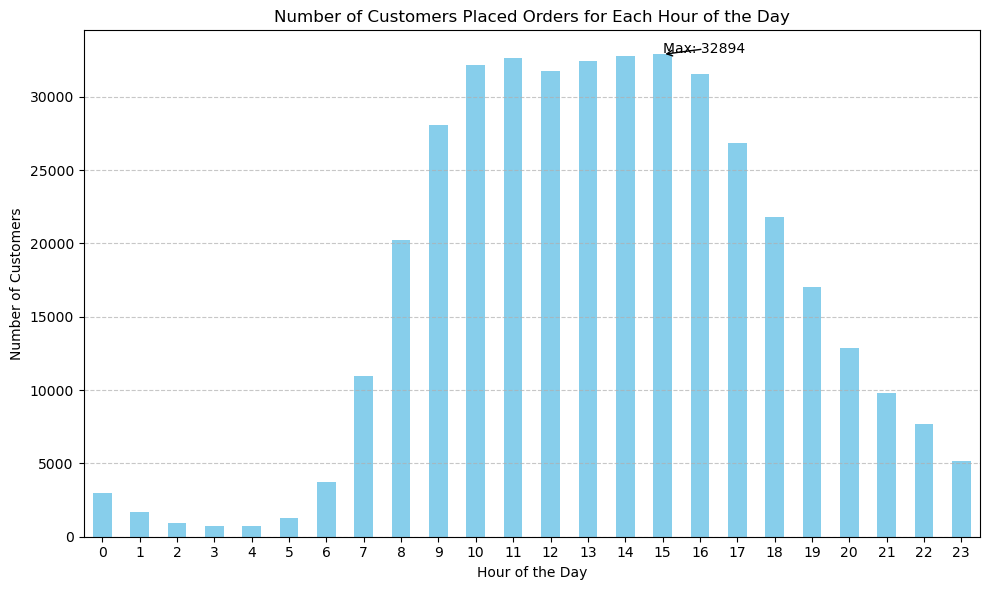

In [55]:
# group by 'order_hour_of_day' and count the number of unique 'user_id' values for each hour.
hourly_orders = df_orders.groupby('order_hour_of_day')['user_id'].nunique()
# Plot the counts for each hour
plt.figure(figsize=(10, 6))
hourly_orders.plot(kind='bar', color='skyblue')
plt.title('Number of Customers Placed Orders for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# to highlight the maximum number of customers who placed an order at 15:00.
max_value = hourly_orders.max()
max_hour = hourly_orders.idxmax()
plt.annotate(f'Max: {max_value}', xy=(max_hour, max_value), xytext=(max_hour, max_value + 100),
             arrowprops=dict(facecolor='red', arrowstyle='->'))
plt.tight_layout()
plt.show()

**We can observe a normal distribution for number of customers who placed orders through the day, with the peak of orders happening at 15:00 highlighted on the histogram.**

**3.3. Create a plot that shows what day of the week people shop for groceries.**

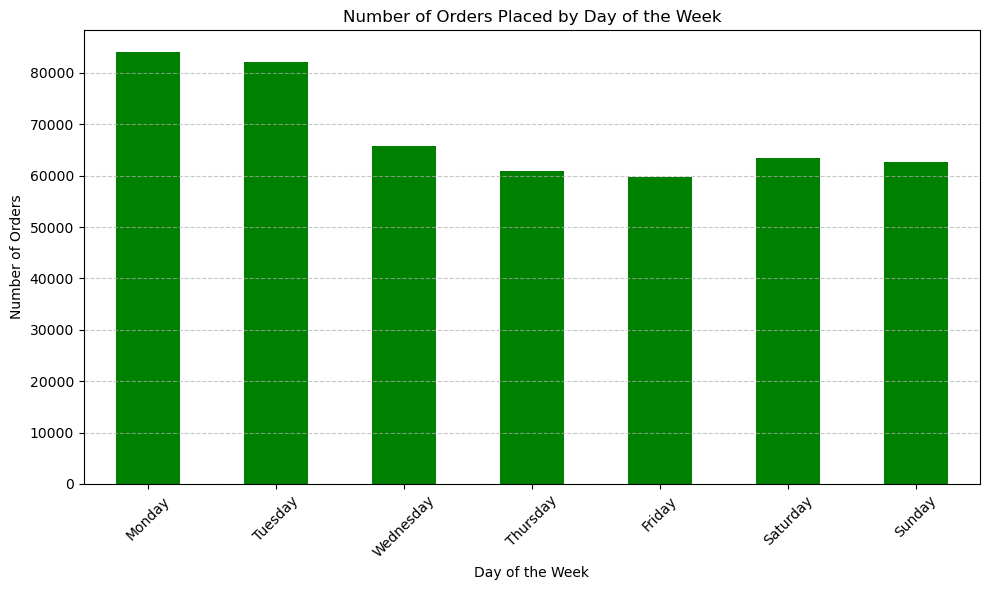

In [56]:
# group by 'order_dow' and count the number of orders for each day.
daily_orders = df_orders['day_of_week'].value_counts()
# define the order of the days of the week (Monday to Sunday).
order_of_days = list(calendar.day_name)
# reindex the daily_orders Series with the order_of_days.
daily_orders = daily_orders.reindex(order_of_days)
# plot the counts for each day.
plt.figure(figsize=(10, 6))
daily_orders.plot(kind='bar', color='green')
plt.title('Number of Orders Placed by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**We can see that most of orders are received on Monday though the week, keeping slightly less stable through the days of the week.**

**3.4 Create a plot that shows how long people wait until placing their next order, and comment on the minimum and maximum values.**

In [57]:
# to see the minimum and maximum values when customers place an order since the last one.
df_orders['days_since_prior_order'].describe()

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

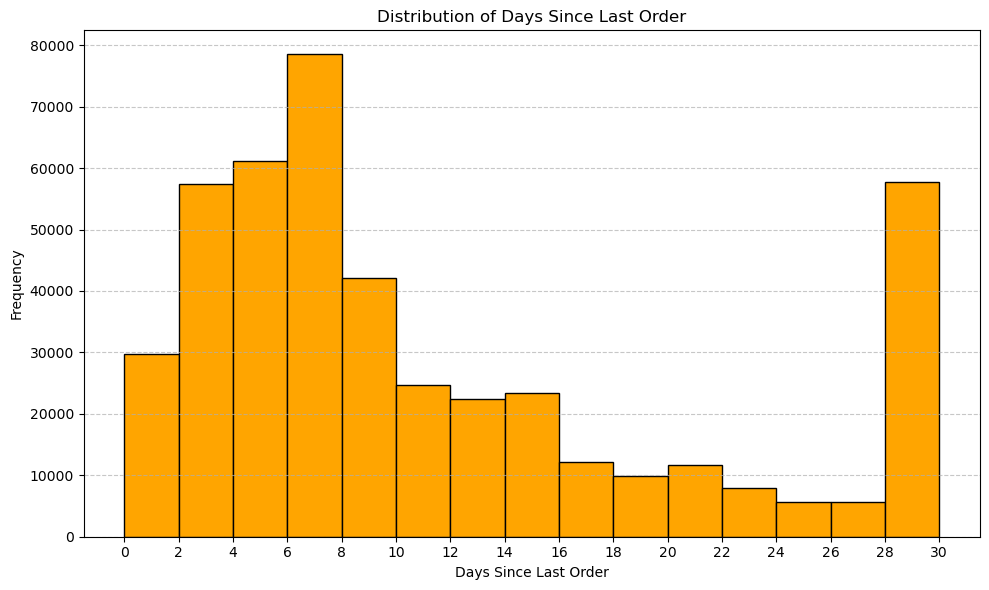

Minimum days since last order: 0.0
Maximum days since last order: 30.0


In [58]:
# define the bin edges at intervals of 2 days from 0 to 30
bin_edges = np.arange(0, 32, 2)  # start from 0, end at 30, with step size of 2
# plot a histogram of days_since_prior_order
plt.figure(figsize=(10, 6))
plt.hist(df_orders['days_since_prior_order'], bins=bin_edges, color='orange', edgecolor='black')
plt.title('Distribution of Days Since Last Order')
plt.xlabel('Days Since Last Order')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 31, 2))  # set the x-axis ticks at intervals of 2 days
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# get the minimum and maximum values
min_days = df_orders['days_since_prior_order'].min()
max_days = df_orders['days_since_prior_order'].max()

print(f"Minimum days since last order: {min_days}")
print(f"Maximum days since last order: {max_days}")

**The anomaly we observe on the right edge of the plot may be due to the possibility that customers waited 31 days or more before they place the next order. But customers place an order average once a week, every 7 days.**

**3.5 Is there a difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays? Plot the histograms for both days on the same plot and describe the differences that you see.**

/Users/cesarchaparro/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cesarchaparro/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


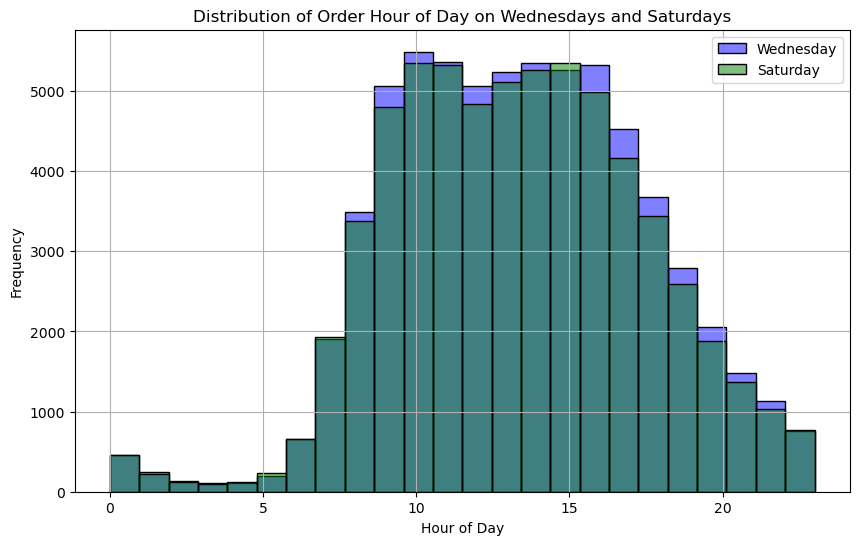

In [59]:
# filter data for Wednesdays and Saturdays.
wednesday_data = df_orders[df_orders['day_of_week'] == 'Wednesday']
saturday_data = df_orders[df_orders['day_of_week'] == 'Saturday']
# create histograms for both days.
plt.figure(figsize=(10, 6))
sns.histplot(wednesday_data['order_hour_of_day'], bins=24, color='blue', alpha=0.5, label='Wednesday')
sns.histplot(saturday_data['order_hour_of_day'], bins=24, color='green', alpha=0.5, label='Saturday')
plt.title('Distribution of Order Hour of Day on Wednesdays and Saturdays')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

**Peak Ordering hours are from around 10:00 to 15:00 for order placement on both Wednesdays and Saturdays. The highest bars in the histograms for both days are at 10:00, they represent the hours when orders are most commonly placed.
Distribution Shape is a normal distribution for both days. There are minimal differences in the spread and symmetry of the distributions.
There are no significant Rush Hours, specific hours during which orders are significantly higher compared to the rest of the day.
Off-Peak Hours are happening through the night hours, and that is logical.In these times the platform experiences less traffic of customers.**

In [60]:
# filter data for Saturdays and Wednesdays.
saturday_wednesday_data = df_orders[df_orders['day_of_week'].isin(['Saturday', 'Wednesday'])]
saturday_wednesday_data.groupby(['day_of_week'])['order_hour_of_day'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
Saturday,63488.0,13.377504,4.245720,0.0,10.0,13.0,16.0,23.0
Wednesday,65833.0,13.442772,4.258655,0.0,10.0,13.0,16.0,23.0


**Besides the plot we can see also with the figures that the distribution is very simiilar for both days activity. It is almost identical.**

**3.6 Plot the distribution for the number of orders that customers place (e.g. how many customers placed only 1 order, how many placed only 2, how many only 3, and so on…).**

In [61]:
# group the data frame by users and aggregate the orders for each user.
order_per_user = df_orders.groupby(['user_id'])['order_id'].nunique().reset_index()
order_per_user

,user_id,order_id
0,2,2
1,4,2
2,5,1
3,6,2
4,7,2
...,...,...
157432,206203,1
157433,206206,7
157434,206207,5
157435,206208,9


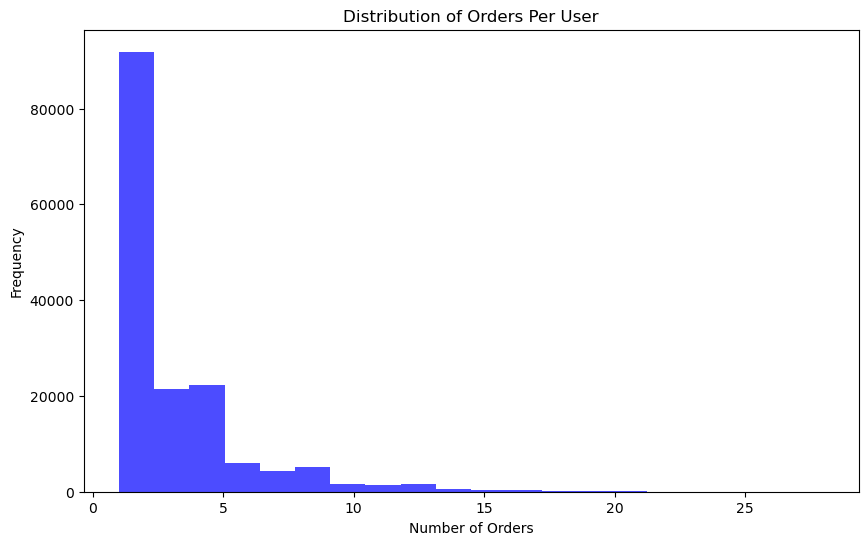

In [62]:
# plot histogram.
plt.figure(figsize=(10, 6))
plt.hist(order_per_user['order_id'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Orders Per User')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

**We can observe that users place an average of 2 orders each one. Being the minimum order for user 1 order and the maximum orders that a user made was 28.** 

In [63]:
# to see in numbers the distribution of orders per user.
order_per_user.order_id.describe()

count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: order_id, dtype: float64

**3.7 What are the top 20 products that are ordered most frequently (display their id and name)?**

In [64]:
# merge df_order_products and df_products to associate product names with their IDs.
merged_df = pd.merge(df_order_products, df_products, on='product_id', how='inner')
# group by product ID and count the occurrences of each product.
product_counts = merged_df['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']
# merge with df_products to get product names.
product_info = pd.merge(product_counts, df_products[['product_id', 'product_name']], on='product_id', how='left')
# select the top 20 most frequently ordered products.
top_20_products = product_info.head(20)
# change the index from 0-based to 1-based.
top_20_products.index = top_20_products.index + 1
# display the top 20 products with their IDs, names, and counts.
print("Top 20 most frequently ordered products:")
top_20_products[['product_id', 'product_name', 'count']]

Top 20 most frequently ordered products:


,product_id,product_name,count
1,24852,banana,66050
2,13176,bag of organic bananas,53297
3,21137,organic strawberries,37039
4,21903,organic baby spinach,33971
5,47209,organic hass avocado,29773
6,47766,organic avocado,24689
7,47626,large lemon,21495
8,16797,strawberries,20018
9,26209,limes,19690
10,27845,organic whole milk,19600


**As we can see, this is the list of products on store that are mostly demanded by customers. This is vital data to know to enhance marketing campaigns, promotions or other sales strategies to power the sales.**

**3.8 How many items do people typically buy in one order? What does the distribution look like?**

In [65]:
# merge df_order_products and df_products on 'product_id' to get product names.
merged_df = pd.merge(df_order_products, df_products, on='product_id', how='inner')
# merge the resulting dataframe with df_orders on 'order_id'.
merged_df = pd.merge(merged_df, df_orders, on='order_id', how='inner')
# group by 'order_id' and count the number of unique products in each order.
items_per_order = merged_df.groupby('order_id')['product_id'].nunique().reset_index(name='items')
# sort items_per_order in descending order by the 'items' column.
items_per_order = items_per_order.sort_values(by='items', ascending=False)
items_per_order

,order_id,items
8198,61355,126
434923,3308010,114
281192,2136777,108
22695,171934,104
257848,1959075,97
...,...,...
188348,1433238,1
188359,1433339,1
249432,1896378,1
188316,1432963,1


In [66]:
# summary statistics for the 'order_id' and 'items' columns.
items_per_order.describe()

,order_id,items
count,4.498770e+05,449877.000000
mean,1.710673e+06,10.064518
std,9.866315e+05,7.513006
min,4.000000e+00,1.000000
25%,8.577110e+05,5.000000
50%,1.710966e+06,8.000000
75%,2.563489e+06,14.000000
max,3.421079e+06,126.000000


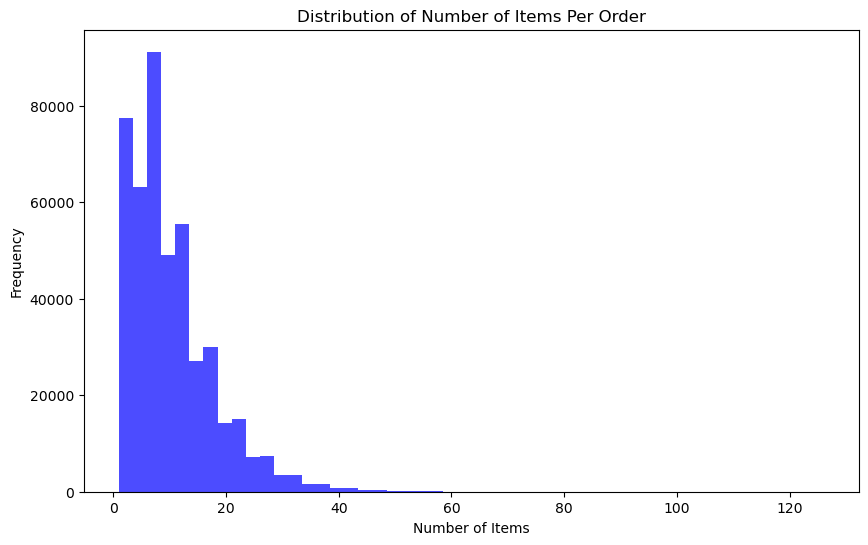

In [67]:
# merge df_order_products and df_products on 'product_id' to get product names.
merged_df = pd.merge(df_order_products, df_products, on='product_id', how='inner')
# merge the resulting dataframe with df_orders on 'order_id'.
merged_df = pd.merge(merged_df, df_orders, on='order_id', how='inner')
# group by 'order_id' and count the number of unique products in each order.
items_per_order = merged_df.groupby('order_id')['product_id'].nunique().reset_index(name='items')
# Plot a histogram of the 'items' column
plt.figure(figsize=(10, 6))
plt.hist(items_per_order['items'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Number of Items Per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

**On average users buy 8 products on each purchase. This data may help the Store to develop any special delivery, or push special promotions to add more products to the cart, or even to consider the packaging being used in the store to be able to carry this volume of products. We can also see from the plot that there purchases decrease on number as more products are on the cart.**

**3.9 What are the top 20 items that are reordered most frequently (display their names and product IDs)?**

In [68]:
# merge df_order_products with df_products to get product names.
merged_df = pd.merge(df_order_products, df_products, on='product_id', how='left')
merged_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,chicken breast tenders breaded,129.0,1.0
1,567889,1560,1,1,bag of ice,37.0,1.0
2,2261212,26683,1,1,cafe latte pure lightly sweetened iced coffee ...,91.0,16.0
3,491251,8670,35,1,diced tomatoes,81.0,15.0
4,2571142,1940,5,1,organic 2% reduced fat milk,84.0,16.0
...,...,...,...,...,...,...,...
4545002,577211,15290,12,1,orange bell pepper,83.0,4.0
4545003,1219554,21914,9,0,peanut butter & jelly fruit & nut food bar,3.0,19.0
4545004,692640,47766,4,1,organic avocado,24.0,4.0
4545005,319435,691,8,1,organic promise strawberry fields cereal,121.0,14.0


In [69]:
# group by product ID and calculate the mean of 'reordered' column.
reorder_rates = merged_df.groupby(['product_id', 'product_name'])['reordered'].mean().reset_index()
# sort the DataFrame by reorder rate in descending order.
reorder_rates_sorted = reorder_rates.sort_values(by='reordered', ascending=False)
reorder_rates_sorted

,product_id,product_name,reordered
18402,20164,toll house ultimates dark chocolate delight co...,1.0
18411,20173,three sisters- medium roast organic whole beans,1.0
45317,49625,golden wheat deep cleanse shampoo,1.0
45285,49589,spray red honeysuckle nectar air freshener,1.0
18307,20064,lunchables mini hot dogs with capri sun,1.0
...,...,...,...
18342,20102,mykind organic plant calcium,0.0
11,14,fresh scent dishwasher cleaner,0.0
120,133,purifying daily detox scrub,0.0
121,134,stain release boost in-wash stain remover pacs,0.0


In [70]:
# select the top 20 products with the highest reorder rates.
top_20_reordered = reorder_rates_sorted.head(20)
# display the top 20 items that are reordered most frequently (names and product IDs).
top_20_reordered[['product_name', 'product_id']]

,product_name,product_id
18402,toll house ultimates dark chocolate delight co...,20164
18411,three sisters- medium roast organic whole beans,20173
45317,golden wheat deep cleanse shampoo,49625
45285,spray red honeysuckle nectar air freshener,49589
18307,lunchables mini hot dogs with capri sun,20064
45330,pecans- maple- premium blend,49639
12640,parsley freeze-dried herbs,13888
26727,lake shore blend medium roast coffee,29247
41310,beneful chopped blends with beef- tomatoes- ca...,45261
2674,cheddar crunchin' crackers,2939


**These are the top 20 products in Store that are most often reordered. This data is important to keep enough stock of products and predict when is necessary to fulfill the Store.**

**4.0 For each product, what proportion of its orders are reorders (create a table with columns for the product ID, product name, and reorder proportion)?**

In [71]:
# merge df_products and df_order_products to obtain product information and reorder status.
merged_df = pd.merge(df_products, df_order_products, on='product_id', how='inner')
# calculate total number of orders for each product.
total_orders_per_product = merged_df.groupby('product_id')['order_id'].nunique()
total_orders_per_product

product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49684      1
49685      2
49686     24
49687      1
49688      9
Name: order_id, Length: 45376, dtype: int64

In [72]:
# calculate total number of reorder instances for each product.
total_reorders_per_product = merged_df.groupby('product_id')['reordered'].sum()
total_reorders_per_product

product_id
1        158
2          0
3         31
4         25
7          1
        ... 
49684      0
49685      1
49686     15
49687      0
49688      1
Name: reordered, Length: 45376, dtype: int64

In [73]:
# calculate proportion of reorder for each product.
reorder_proportion = total_reorders_per_product / total_orders_per_product
reorder_proportion

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49684    0.000000
49685    0.500000
49686    0.625000
49687    0.000000
49688    0.111111
Length: 45376, dtype: float64

In [74]:
# create a DataFrame with product ID and reorder proportion.
product_reorder_table = pd.DataFrame({
    'product_id': reorder_proportion.index,
    'reorder_proportion': reorder_proportion.values
})

product_reorder_table

,product_id,reorder_proportion
0,1,0.564286
1,2,0.000000
2,3,0.738095
3,4,0.510204
4,7,0.500000
...,...,...
45371,49684,0.000000
45372,49685,0.500000
45373,49686,0.625000
45374,49687,0.000000


In [75]:
# merge product names from df_products.
product_reorder_table = pd.merge(product_reorder_table, df_products[['product_id', 'product_name']], on='product_id', how='left')
product_reorder_table

,product_id,reorder_proportion,product_name
0,1,0.564286,chocolate sandwich cookies
1,2,0.000000,all-seasons salt
2,3,0.738095,robust golden unsweetened oolong tea
3,4,0.510204,smart ones classic favorites mini rigatoni wit...
4,7,0.500000,pure coconut water with orange
...,...,...,...
45371,49684,0.000000,vodka- triple distilled- twist of vanilla
45372,49685,0.500000,en croute roast hazelnut cranberry
45373,49686,0.625000,artisan baguette
45374,49687,0.000000,smartblend healthy metabolism dry cat food


In [76]:
product_reorder_table.describe()

,product_id,reorder_proportion
count,45376.000000,45376.000000
mean,24860.841524,0.386744
std,14336.471245,0.272222
min,1.000000,0.000000
25%,12495.750000,0.166667
50%,24824.500000,0.408124
75%,37270.750000,0.576075
max,49688.000000,1.000000


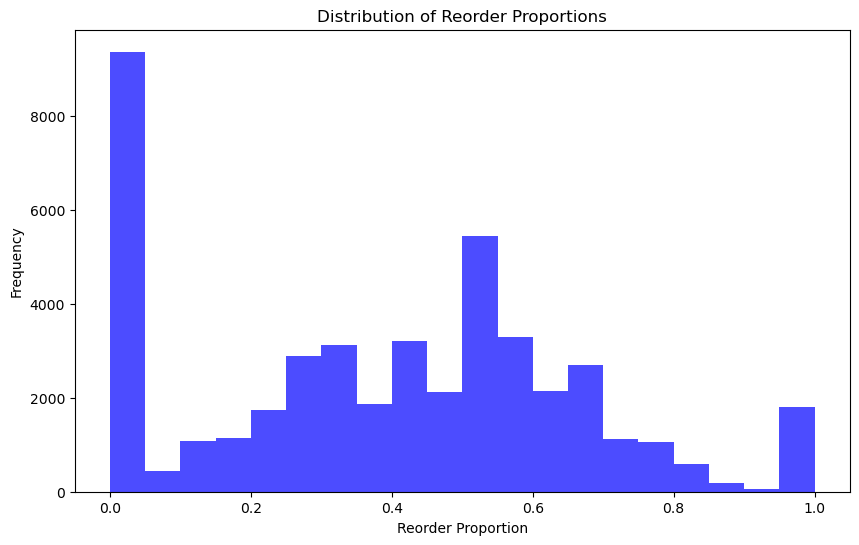

In [77]:
# plot histogram of reorder proportions.
plt.figure(figsize=(10, 6))
plt.hist(product_reorder_table['reorder_proportion'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Reorder Proportions')
plt.xlabel('Reorder Proportion')
plt.ylabel('Frequency')
plt.show()

**Output from the above analysis:<br>
    - About 38.7% of products are reordered.<br>
    - The standard deviation for product IDs is approximately 14,336, and for reorder proportion is approximately 0.272, indicating the dispersion of data points around the mean.<br>
    - The minimum product ID is 1, and the minimum reorder proportion is 0, indicating that there are products that have never been reordered.<br>
    - 50% of products have a reorder proportion below 0.408.>br>
    - 75% of reorder proportions are below approximately 0.576.<br>
    the maximum reorder proportion is 1, indicating that there are products that have been reordered 100% of the time.**
    

**4.1 For each customer, what proportion of their products ordered are reorders?**

In [78]:
# merge the dataframes to associate each product with its corresponding order and customer.
merged_df = pd.merge(df_order_products, df_orders, on='order_id')
merged_df = pd.merge(merged_df, df_products, on='product_id')
merged_df

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week,product_name,aisle_id,department_id
0,2141543,11440,17,0,58454,25,0,15,8.0,Monday,chicken breast tenders breaded,129,1
1,1918689,11440,14,1,131726,31,0,8,7.0,Monday,chicken breast tenders breaded,129,1
2,2151362,11440,46,0,144911,11,1,11,30.0,Tuesday,chicken breast tenders breaded,129,1
3,2267548,11440,9,0,69316,1,5,10,NaN,Saturday,chicken breast tenders breaded,129,1
4,2591997,11440,3,1,136590,45,4,7,4.0,Friday,chicken breast tenders breaded,129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527790,1176629,170,1,0,72889,92,4,9,1.0,Friday,single herbs ginkgo leaf dietary supplement,47,11
4527791,3139402,30458,1,0,196661,4,5,14,24.0,Saturday,regular mouth lids with bands,10,17
4527792,1859901,10363,1,0,39917,14,1,20,15.0,Tuesday,100% raw coconut drink,98,7
4527793,1021500,25973,1,1,160507,3,3,9,2.0,Thursday,assortment bittersweet chocolate box,45,19


In [79]:
# calculate the total number of products ordered and the number of reordered products for each user.
user_product_counts = merged_df.groupby(['user_id', 'product_id']).agg({'reordered': 'sum', 'order_id': 'count'}).reset_index()
user_product_counts.columns = ['user_id', 'product_id', 'reordered_count', 'total_count']
user_product_counts

,user_id,product_id,reordered_count,total_count
0,2,9681,0,1
1,2,12000,0,1
2,2,13176,0,1
3,2,16589,0,1
4,2,20574,0,1
...,...,...,...,...
3367977,206209,39216,0,1
3367978,206209,40992,0,1
3367979,206209,41213,1,1
3367980,206209,41665,0,1


In [80]:
# calculate the proportion of reordered products for each user.
user_product_counts['reorder_proportion'] = user_product_counts['reordered_count'] / user_product_counts['total_count']
# calculate the average proportion of reordered products for each user.
average_reorder_proportion = user_product_counts.groupby('user_id')['reorder_proportion'].mean().reset_index()
# display the result.
average_reorder_proportion

,user_id,reorder_proportion
0,2,0.020000
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.923077
...,...,...
149590,206203,0.222222
149591,206206,0.676471
149592,206207,0.848485
149593,206208,0.577083


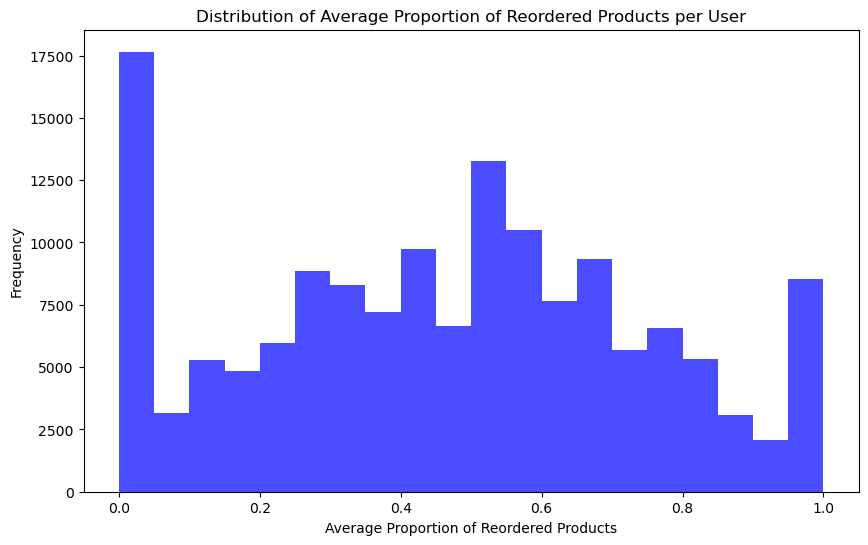

In [81]:
# plot histogram.
plt.figure(figsize=(10, 6))
plt.hist(average_reorder_proportion['reorder_proportion'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Average Proportion of Reordered Products per User')
plt.xlabel('Average Proportion of Reordered Products')
plt.ylabel('Frequency')
plt.show()

**This output provides insights into the reordering behavior of individual users. Users with higher reorder proportions tend to frequently reorder products, while those with lower or zero reorder proportions may either be new users who haven't placed reorders yet or users who rarely reorder products.**

**4.2 What are the top 20 items that people put in their carts first (display the product IDs, product names, and number of times they were the first item added to the cart)?**

In [82]:
# merge df_order_products and df_products to get product names.
merged_df = pd.merge(df_order_products, df_products, on='product_id', how='inner')
merged_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,chicken breast tenders breaded,129,1
1,147172,11440,7,1,chicken breast tenders breaded,129,1
2,3341719,11440,4,1,chicken breast tenders breaded,129,1
3,1938779,11440,8,1,chicken breast tenders breaded,129,1
4,1728338,11440,23,0,chicken breast tenders breaded,129,1
...,...,...,...,...,...,...,...
4527790,267402,45226,14,0,sweet teriyaki chicken oven sauce,5,13
4527791,2621676,25201,10,0,crisp waters candle scents,101,17
4527792,937623,49153,2,0,shine collection brillance shampoo,22,11
4527793,532895,8182,1,0,total mint stripe gel toothpaste,20,11


In [83]:
# filter for rows where the product was the first item added to the cart.
first_items_df = merged_df[merged_df['add_to_cart_order'] == 1]
first_items_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
6,1463503,11440,1,0,chicken breast tenders breaded,129,1
17,2201430,11440,1,1,chicken breast tenders breaded,129,1
21,1036054,11440,1,1,chicken breast tenders breaded,129,1
50,3008652,11440,1,1,chicken breast tenders breaded,129,1
62,2946144,11440,1,1,chicken breast tenders breaded,129,1
...,...,...,...,...,...,...,...
4527760,1518168,16952,1,0,sensitive night cream,73,11
4527765,1776450,21507,1,0,gluten free all-purpose rice flour blend,17,13
4527783,2333206,25467,1,0,madagascar pure vanilla,17,13
4527793,532895,8182,1,0,total mint stripe gel toothpaste,20,11


In [84]:
# group by 'product_id' and count occurrences of each product.
first_items_count = first_items_df['product_id'].value_counts()
first_items_count

product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
         ...  
48212        1
821          1
26109        1
9674         1
14009        1
Name: count, Length: 26643, dtype: int64

In [85]:
# get the top 20 products that were the first item added to the cart.
top_20_first_items = first_items_count.head(20)
# get product names corresponding to the top 20 first items.
top_20_first_items_info = df_products[df_products['product_id'].isin(top_20_first_items.index)]
# reset the index of the DataFrame.
top_20_first_items_info.reset_index(drop=True, inplace=True)
# add a new column with index values from 1 to 20.
top_20_first_items_info['rank'] = range(1, 21)
# display the top 20 first items.
# display the updated DataFrame.
print("Top 20 items that people put in their carts first:")
top_20_first_items_info[['rank', 'product_id', 'product_name']]

Top 20 items that people put in their carts first:


/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_44776/1713680475.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_first_items_info['rank'] = range(1, 21)


,rank,product_id,product_name
0,1,196,soda
1,2,5785,organic reduced fat 2% milk
2,3,12341,hass avocados
3,4,13176,bag of organic bananas
4,5,16797,strawberries
5,6,19660,spring water
6,7,21137,organic strawberries
7,8,21903,organic baby spinach
8,9,22935,organic yellow onion
9,10,24852,banana


**These are the top 20 products that users place on their cart before anything else. This may mean products of first necessity, products that users consume daily or often. And we can also obsesrve that most are from fruits and dairy products, which easily can be the first aisles on the Store when users enter or in case of online Store it can be because their Section appears first on the menu page.**

**END OF PROJECT**